<center>
    <img src="https://github.com/GuitarsAI/MLfAS/blob/master/images/mlfasp.png?raw=1">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

In [2]:
# Configuration for Google Colab Runtime Environment

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  !mkdir ./images
else:
  print('Not running on CoLab')

Running on CoLab


# Neural Networks for Classification

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ld0cwTiXrU0?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We saw in neural networks for detection, that they need to detect if a pattern is present or not. For the classification tasks we have a class of patterns, and we know that a pattern of one of the classes has to be present. The network has to decide which class. A classical application is the classification of handwritten digits. The network input are images of handwritten digits, and each image belongs to one of the 10 digit classes, 0 to 9.

The network usually has as many outputs as classes (10 in the digit example), and each output might represent the probability that the image at the networks input belongs to the corresponding class. Since we know that it must be one of the 10 digits, the probabilities must add up to 1.

A classical data base for this example is the MNIST database (Modified National Institute of Standards and Technology database):

In [4]:
%%html
<iframe src="https://en.wikipedia.org/wiki/MNIST_database" width="900" height="600"></iframe>

It contains 60000 gray-scale images of handwritten images of size 28x28 pixels.

Python has a function to directly access and download these images, in `torchvision.datasets.MNIST`.

Look at our example:

In [5]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/h5dliJHNqFg?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

It uses `train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST(..)` to load **training set** with 100 random images and target classes, and a **test set** of 10 random images and target classes.

After loading and then reading in the training set with the `next(..)` function, we can check the resulting data type with a print statement and with the `.type()` function: `print( "X_train.type()=",X_train.type(),"y_train.type()=",y_train.type())`

We obtain `X_train.type()= torch.FloatTensor y_train.type()=torch.LongTensor`

Observe that the input signal, the images, have the type `torch.FloatTensor`, whereas the target, the correct digit class indices, have the type torch.LongTensor! **This difference in Types** becomes important when we apply a **loss function.**

Next we have another "print" line to check for the shape and content of our data tensors:
```python
print("batch_idx=", batch_idx, "X_train.shape=",
      X_train.shape, "y_train.shape=", 
      y_train.shape, "y_train=",y_train)```
      
which prints out: 
`batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28])
y_train.shape= torch.Size([100])`

"X_train.shape= torch.Size([100, 1, 28, 28])" shows that the first index is for the image (100 images), the 2nd index is for the batch and only contains 1 batch, and the remaining 2 indices are for the 28 pixels vertically and horizontally, respectively.

"y_train.shape= torch.Size([100])" shows the shape of the target, which is a 1-dimensional array of 100 entries. It is one number (the correct digit) for each image. This can also be seen in the final part of the printout:

`y_train= tensor([ 5, 7, 1, 2, 2, 0, 1, 0, 3, 4, 2, 2, 6, 4,
9, 2, 6, 3, 1, 6, 1, 8, 6, 7, 1, 0, 5, 6,
3, 7, 6, 6, 1, 2, 5, 5, 0, 1, 6, 3, 7, 4,
7, 9, 0, 5, 5, 2, 3, 6, 8, 1, 6, 1, 4, 5,
9, 5, 4, 1, 5, 6, 2, 9, 2, 1, 7, 7, 1, 1,
6, 6, 2, 2, 6, 7, 9, 0, 7, 9, 5, 3, 1, 6,
0, 3, 8, 8, 2, 4, 1, 9, 4, 3, 7, 5, 7, 5,
6, 2])`

Then we have to define our neural network as "Class DenseNet(..)". We take 2 fully connected layers (the nn.Linear), with bias and with a relu activation function only after the first layer:

```python
# define the neural network model
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels,
        out_features=num_pixels))
        self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels,
        out_features=num_classes))
        
    def forward(self, x):
        x = F.relu(self.layer1(x)) #First layer with activation function
        x = self.layer2(x) #Second layer
        #x = torch.nn.softmax(x)
        return x
```
    
Here we choose the size of the hidden layer (the output of layer 1) the same as the number of pixels at the input, but it could also be a different number.

Our program plots the first 4 images of the training set. For that we need to know the meaning of the indices (see above).

For instance for the 2nd image in the set, we plot:
`plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))`

Index "1" is the index of the image, index "0" is for the current batch or set of images (in our example we only have batch 0), and the remaining 2 indices to the right, which are not seen here, are the image pixel indices. An example set of images is:

<img src='https://github.com/GuitarsAI/MLfAS/blob/master/images/03_01_imagesExample.png?raw=1' width='500'>

After showing the images, we can reshape or flatten them into 1-dimensional arrays to make them suitable as input to our fully connected linear layers (remember, they only take 1-dimensional inputs). For that, we use the `.view` function:

`#Flatten the images:
X_train = X_train.view(X_train.shape[0], num_pixels)`

where `X_train.shape[0]` is the number of images in the batch.

Observe that we don't need to reshape the target, because that is already a 1-dimensional array of the correct classes.

After showing the images, the program initialized our neural network model with:
`model = DenseNet()#.to('cpu')`

Then it defines the loss function with:
`loss_fn = nn.CrossEntropyLoss()`

The **"CrossEntropyLoss"** is made for **classification** tasks, hence it expects the data type `torch.FloatTensor` from the 10 outputs of our neural network (which fits), and `torch.LongTensor` as data type for the target data, which again fits! (also look at: https://discuss.pytorch.org/t/runtimeerror-expected-object-of-type-torch-longtensor-but-found-type-torch-floattensor/23289)

Go to https://pytorch.org/docs/stable/nn.html and search in the website for `nn.CrossEntropyLoss`. There you can find more detail about its definition.

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6jdwKxurqK4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [7]:
%%html
<iframe src="https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss" width="900" height="600"></iframe>

It basically first applies a SoftMax function to the 10 outputs of our neural network, and turns them into probabilities, such that they always sum up to 1 (it also applies a logarithm because that is part of the cross entropy calculation, and to make the optimization more precise for very small values). 

It also turns the target data into probabilities of 10 classes. It assigns the correct class a probability of 1, and to the incorrect classes a probability of 0. The it applies the Cross Entropy (https://en.wikipedia.org/wiki/Cross_entropy) to these two resulting probability distributions. The Cross Entropy gives a **measure about how different 2 probability distributions are.**

The cross entropy between two distributions *p(x)* and *q(x)* over classes x is defined as:

$$\large
H(p,q)=- \sum_x p(x) \log(q(x))$$

It can be interpreted as the number of bits needed to describe a second probability distribution based on a first probability distribution. If they are identical, then we need 0 bits, and we minimized the Cross Entropy. Now *p(x)* is our target distribution, which is 1 for the correct class and 0 elsewhere. Hence the sum degenerates to just a single summand for the correct class *x=c* , and it becomes,

$$\large
H(p,q)= - \log(q(c))$$

where *q(c)* is the output of our network for the correct class *c*.

<cite>(see also the book by Eugene Charniak: "Introduction to Deep Learning", MIT Press, 2018.)</cite>

Hence after training or optimization the probability distribution of our network (after Softmax) should be as similar as possible to the distribution of the target.

When we apply the trained network (which is called **"inference"**, as opposed to **"training"**), instead of the *Softmax* we can simply take the argmax function, which returns the index with the largest output (or probability).

Next we define the optimizer for the training, with,
`optimizer = torch.optim.Adam(model.parameters())`

As before, "Adam" is a popular and effective optimizer for neural networks (for "Adaptive Moments" and is a variation
of Stochastic Gradient Descent, see e.g. in https://towardsdatascience.com/adam-latest-trends-indeep-learning-optimization-6be9a291375c).

In our case we obtain a very fast optimization with only 10 "epochs" (iterations), with the decreasing loss function as in this printout:

`0 2.32210111618042
2 1.169947624206543
4 0.5694917440414429
6 0.28307318687438965
8 0.1408798098564148`

Finally we compute the loss on our test set of 10 images:

`Loss on the test set: tensor(0.4930)`

which is clearly worse than on our training set (where we reached about 0.14). We also test the performance on an example image from the test set, at "inference" using the argmax function. It shows an image from the test set, and predicts the corresponding class.

The program first shows the image to be recognized:

<img src='https://github.com/GuitarsAI/MLfAS/blob/master/images/03_02_imageEx.png?raw=1' width='500'>

The corresponding printout from the prediction during inference is `prediction= tensor(8)` where the "8" is the class, that the network is predicting the input image belonging to (the recognized digit). The image is usually correctly classified (if the human observer also recognizes the digit 8 in the image)!

**Observe** that the network **always outputs a number for a digit**, even when the image **does not contain a digit.**

We could fix this by introducing a class with label "no digit", for which we also would need training data, which makes it difficult.

## PyTorch Example Complete

In [8]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/4xRcB4jB4-M?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw


Extracting /root/Downloads/MNISTfiles/MNIST/raw/train-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw


Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw


Extracting /root/Downloads/MNISTfiles/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Downloads/MNISTfiles/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)




X_train.type()= torch.FloatTensor y_train.type()= torch.LongTensor
batch_idx= 0 X_train.shape= torch.Size([100, 1, 28, 28]) y_train.shape= torch.Size([100]) y_train= tensor([6, 2, 8, 1, 4, 7, 2, 1, 8, 6, 3, 0, 2, 9, 7, 7, 0, 3, 7, 4, 7, 7, 4, 5,
        5, 9, 8, 9, 6, 6, 2, 3, 1, 6, 7, 6, 7, 9, 1, 1, 1, 9, 1, 5, 6, 8, 8, 3,
        3, 3, 8, 7, 0, 8, 7, 3, 3, 8, 3, 8, 2, 1, 8, 6, 8, 8, 6, 9, 1, 5, 1, 7,
        7, 8, 5, 4, 7, 7, 3, 4, 6, 6, 7, 4, 4, 6, 6, 3, 7, 8, 4, 8, 2, 8, 6, 5,
        8, 7, 5, 4])




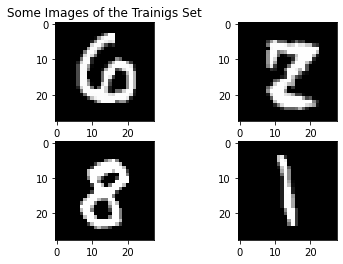

X_train.shape= torch.Size([100, 784])
X_test.shape= torch.Size([10, 784])
Generate Model:
0 2.362582206726074
2 1.2706376314163208
4 0.6602278351783752
6 0.35273993015289307
8 0.1899886280298233
Duration of optimization: 0.3385353088378906
Loss on the test set: tensor(2.7035, grad_fn=<NllLossBackward>)
Wrote to mnistexample_pytorch_weights.torch
sample.shape= torch.Size([784])
Test Ypred= tensor([-1.0807, -0.4439, -0.7421, -0.2596, -1.1628,  0.3973,  1.6357, -0.6643,
         0.2844, -1.3932], grad_fn=<AddBackward0>)
prediction= tensor(6)


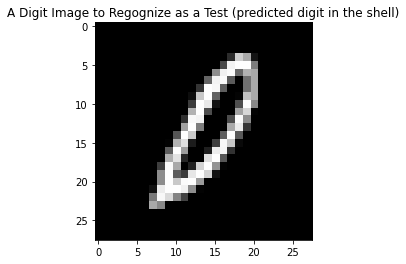

In [9]:
#from: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/
#https://pytorch.org/docs/stable/torchvision/datasets.html#mnist
#Translated to PyTorch and modified to a simple fully connected network,
#by Gerald Schuller, October 2019

import numpy
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import time

device='cpu'
#device='cuda'

# define the neural network model
class DenseNet(nn.Module):
    def __init__(self):
        super(DenseNet, self).__init__()
        self.layer1=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_pixels))
        self.layer2=nn.Sequential(nn.Linear(in_features=num_pixels, out_features=num_classes))
      
   
    def forward(self, x):
        x = F.relu(self.layer1(x))  #First layer with activation function
        x = self.layer2(x)   #Second layer
        #x = torch.nn.Softmax(x)
        return x



batch_size_train = 100
batch_size_test = 10
num_classes = 10  #10 classes according to the 10 possible digits 0,...,9

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
    train=True, download=True,
    transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_train, shuffle=True)
#the Normalize() arguments are mean and standard deviation.

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('~/Downloads/MNISTfiles/', 
                               train=False, download=True,
                               transform=torchvision.transforms.Compose(
                                   [torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size=batch_size_test, shuffle=True)


examples = enumerate(train_loader)
# Plot ad hoc mnist instances

# load (downloaded if needed) the MNIST dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#one batch of 100 images:
batch_idx, (X_train, y_train) = next(examples)
print( "X_train.type()=",X_train.type(), "y_train.type()=",y_train.type())
print("batch_idx=", batch_idx, "X_train.shape=", X_train.shape, "y_train.shape=", y_train.shape, "y_train=", y_train)
examples = enumerate(test_loader)
#one batch of 100 images:
batch_idx, (X_test, y_test) = next(examples)

# plot 4 images as gray scale
plt.subplot(221)
plt.title("Some Images of the Trainigs Set")
plt.imshow(X_train[0,0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1,0], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2,0], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3,0], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


X_testunflat=X_test.clone() #keep original for imshow later
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[2] * X_train.shape[3]


#Flatten the images:
X_train = X_train.view(X_train.shape[0], num_pixels)
print("X_train.shape=",X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("X_test.shape=",X_test.shape)

# normalize inputs from 0-255 to 0-1
#X_train = X_train / 255
#X_test = X_test / 255

# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

   
# build the model
print("Generate Model:")
model = DenseNet()#.to('cpu')
    
loss_fn = nn.CrossEntropyLoss()
#learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters())#, lr=learning_rate)

# Fit the model
X_train=X_train.to(device)
y_train=y_train.to(device)
starttime=time.time()
for epoch in range(10):
    Ypred=model(X_train)
    loss=loss_fn(Ypred, y_train)
    if epoch%2==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
       
endtime=time.time()
print("Duration of optimization:", endtime-starttime)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=200, verbose=2)
# Final evaluation of the model
Ypred=model(X_test)
loss=loss_fn(Ypred, y_test)
#scores = model.forward(X_test, y_test, verbose=0)
print("Loss on the test set:", loss)

torch.save({'model_state_dict': model.state_dict(),
       'optimizer_state_dict': optimizer.state_dict()}, "mnistexample_pytorch_weights.torch")
print("Wrote to mnistexample_pytorch_weights.torch")


#"Inference", predict an example digit test image:
plt.imshow(X_testunflat[1,0], cmap=plt.get_cmap('gray'))
plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

sample=X_test[1,:]
print("sample.shape=", sample.shape)
Ypred=model(sample)
print("Test Ypred=", Ypred)
prediction=torch.argmax(Ypred) #use argmax as the class with the largest output
print("prediction=", prediction)

plt.show()

## Unknown Test Image

In [10]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/rV7KpLe1nRk?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

To test this case of an unknown image, we generate a 28x28 picture containing just random numbers between 0 and 1 (or 0 and 255 in a jpeg image).

In [13]:
import cv2
import numpy as np
rpic=np.random.rand(28,28)*255 #range for 8 bit unsigned integer
cv2.imwrite("./images/randpic.jpg", rpic);

We extend our main program section such that it inlcudes reading our random jpeg image for testing after it took an image from the MNIST test set:

Picture  0
sample.shape= torch.Size([784])
Test Ypred= tensor([-1.0807, -0.4439, -0.7421, -0.2596, -1.1628,  0.3973,  1.6357, -0.6643,
         0.2844, -1.3932], grad_fn=<AddBackward0>)
Probabilities: tensor([0.0302, 0.0570, 0.0423, 0.0685, 0.0278, 0.1322, 0.4561, 0.0457, 0.1181,
        0.0221])
prediction= tensor(6)
Probably not a digit


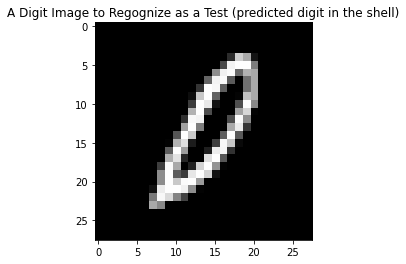

Picture  1
sample.shape= torch.Size([784])
Test Ypred= tensor([ 0.0945, -0.3732,  0.5522, -0.0677, -0.7717, -0.5112, -0.2774, -0.6847,
         0.4926, -0.2874], grad_fn=<AddBackward0>)
Probabilities: tensor([0.1199, 0.0751, 0.1894, 0.1019, 0.0504, 0.0654, 0.0826, 0.0550, 0.1785,
        0.0818])
prediction= tensor(2)
Probably not a digit


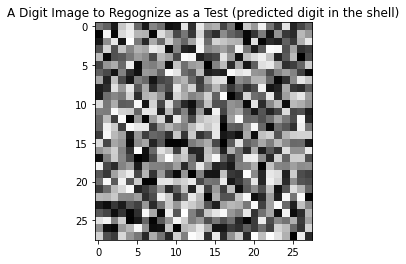

In [12]:
#"Inference", predict an example digit test image:
for pic in range(2):
    print("Picture ", pic)
    if pic==0: #take image from test set:
        X_testorig=X_testunflat[1,0]
        sample=X_test[1,:]
    if pic==1: #read externa random test image, size 28x28 pixel:
        from PIL import Image
        image = Image.open('./images/randpic.jpg')
        import torchvision.transforms.functional as TF
        X_testorig = TF.to_tensor(image)
        X_testorig = X_testorig[0,:,:]
        sample=X_testorig.view(28*28)
        
    plt.imshow(X_testorig, cmap=plt.get_cmap('gray'))
    plt.title("A Digit Image to Regognize as a Test (predicted digit in the shell)")

    print("sample.shape=", sample.shape)
    Ypred=model(sample)
    sm = torch.nn.Softmax(dim=0)
    print("Test Ypred=", Ypred)
    probabilities = sm(Ypred.detach())
    print("Probabilities:",probabilities)
    prediction=torch.argmax(probabilities) #use argmax as the class with the largest output
    print("prediction=", prediction)
    if probabilities[prediction] <0.8 : #not confident
        print("Probably not a digit")
    plt.show()